In [1]:
import autoreload

from Cache_Signal import *
from Network import *
%load_ext autoreload
%autoreload 2

D:\AppDownloads\anaconda3\envs\face_detection\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## 信号缓存及滤波

In [4]:
video_path = "./Test_Videos/stable1.mp4"
cache_root_dir = "./Test_Videos/Cached_Signal"

video_length,fps = get_video_length(video_path)
cache_signal_infer([video_path],cache_root_dir,crop_length=video_length)

In [5]:
print("Video length: {:.2f}s   Video fps: {}fps".format(video_length,fps))

Video length: 14.07s   Video fps: 29fps


In [7]:
filtered_root_dir = "./Test_Videos/Filtered_Signal"
filter_cached_signal_infer(cache_root_dir,filtered_root_dir,fps)

In [11]:
def denormalize_HR(batch_HR):
    return batch_HR * 110 + 40

## 读取缓存的数据

(5, 200)
(5, 200)


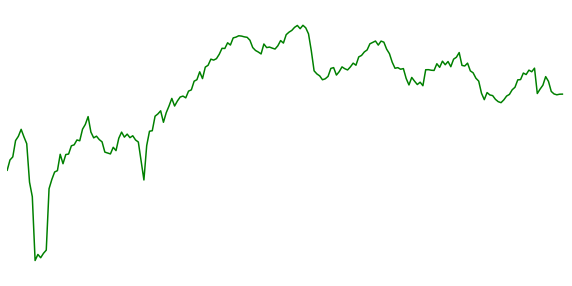

In [9]:
ROI_ids = [8,9,10,11,12]
data_raw = []
data_filtered = []

for i in ROI_ids:
    with open("./Test_Videos/Cached_Signal/stable1/clip1/channel_G_ROI_{}.txt".format(i),'r') as f:
        data_raw.append([float(l) for l in f.read().split()])
data_raw = np.array(data_raw)[:,:200]

for i in ROI_ids:
    with open("./Test_Videos/Filtered_Signal/stable1/clip1/channel_G_ROI_{}.txt".format(i),'r') as f:
        data_filtered.append([float(l) for l in f.read().split()])
data_filtered = np.array(data_filtered)[:,:200]

print(data_raw.shape)
print(data_filtered.shape)
show_signal(data_raw[0])

In [10]:
HR_test_model = HR_network(input_shape=(5,200))  #  eg.input_shape:batch*5*200
HR_test_model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mse',metrics=["mae","mape"])
HR_test_model.load_weights('./model_checkpoints/candidate_model/LSTM-ECNU/loss_0.0021_val_loss_0.0027.h5')

In [12]:
data_filtered = data_filtered.astype(np.float32)

y_out = HR_test_model(data_filtered[np.newaxis,...])  #  shape:batch*1
HR_guessed = denormalize_HR(np.squeeze(y_out))
print(HR_guessed)

63.87588694691658
